# Ensemble average

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

A usual procedure employed to present the average pattern of a variable as a function of time or movement cycle across trials or across subjects is to show the ensemble average curve, which is a fancy name for (typically) the mean $\pm$ 1 standard-deviation curve.

Let's simulate some data and explore different aesthetic variations to present the ensemble average.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath

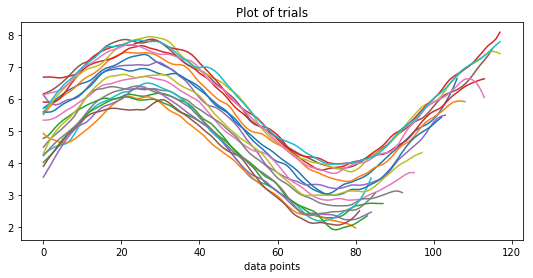

In [2]:
# slighly different data with slightly different duration (number of points)
from scipy.signal import butter, filtfilt
# Butterworth filter
b, a = butter(1, (5/(100/2)), btype = 'low')
y = np.empty([120, 20]) * np.NaN
for i in range(20):
    t = np.arange(0, 100 + np.random.randint(-20, high=20)) / 100
    y[0: t.size, i] = 2*np.sin(2 * np.pi * t) + np.random.randn(t.size) / 2 + t.size / 20
    y[0: t.size, i] = filtfilt(b, a,  y[0: t.size, i])

plt.figure(figsize=(9, 4))
plt.plot(y)
plt.xlabel('data points')
plt.title('Plot of trials')
plt.show()

To calculate the mean and standard deviation across these trials the different trials must have the same number of points.   
We can do this with the [time normalization of data](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/TimeNormalization.ipynb), where we will normalize each trial to the same percent cycle (from 0 to 100%):

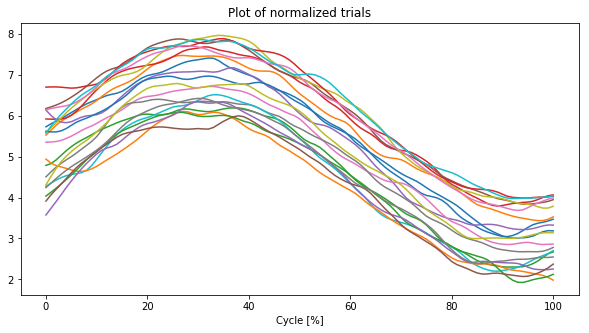

In [4]:
from tnorm import tnorm
# yn, tn, indie = tnorm(y, axis=0, step=1, k=3, smooth=0, mask=None,
#                       nan_at_ext='delete', show=False, ax=None)
yn, tn, indie = tnorm(y)
# plot of the normalized data
plt.figure(figsize=(10, 5))
plt.plot(yn)
plt.xlabel('Cycle [%]')
plt.title('Plot of normalized trials')
plt.show()

So, the trials have the same number of points, now we can calculate the mean and standard deviation curves and plot the ensemble average

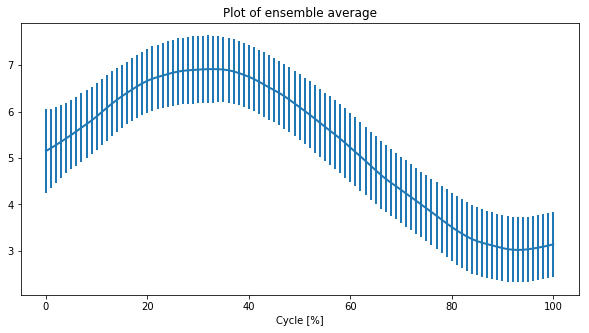

In [5]:
ym, ysd = np.mean(yn, axis=1), np.std(yn, axis=1, ddof=1) # one line is all we need
# plot of the ensemble average
plt.figure(figsize=(10,5))
plt.errorbar(tn, ym, ysd, linewidth=2)
plt.xlabel('Cycle [%]')
plt.title('Plot of ensemble average')
plt.show()

And here are some aesthetic variations to show the ensemble average:

/home/marcos/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


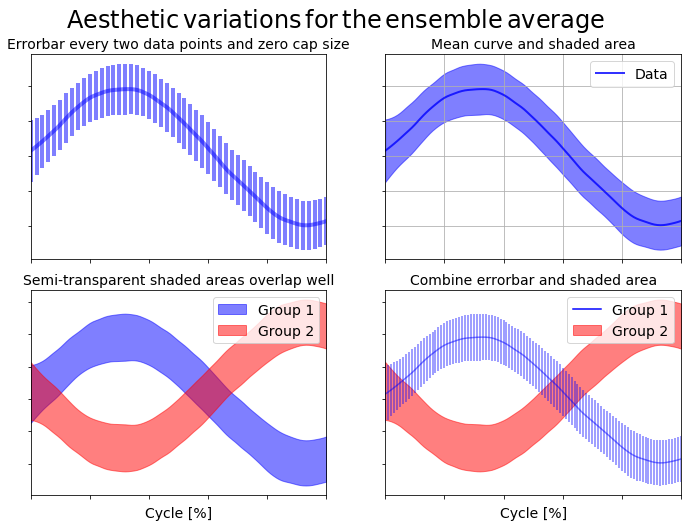

In [6]:
plt.rc('axes', labelsize=14,  titlesize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(10, 7))

ax1 = plt.subplot(221)
ax1.set_title('Errorbar every two data points and zero cap size')
ax1.errorbar(tn, ym, ysd, color = [0, 0, 1, 0.5], capsize=0, errorevery=2, lw=4)

ax2 = plt.subplot(222)
ax2.set_title('Mean curve and shaded area')
ax2.fill_between(tn, ym+ysd, ym-ysd, color = [0, 0, 1, 0.5])
ax2.plot(tn, ym, color = [0, 0, 1, .8], lw=2, label='Data')
ax2.legend(fontsize=14, loc='best', framealpha=.8)
ax2.grid()

ax3 = plt.subplot(223)
ax3.set_title('Semi-transparent shaded areas overlap well')
ax3.fill_between(tn, ym+ysd, ym-ysd, color=[0, 0, 1, 0.5], edgecolor='')
y2 = np.mean(ym) - ym + ym[0]
ax3.fill_between(tn, y2+ysd, y2-ysd, color=[1, 0, 0, 0.5], edgecolor='')
ax3.set_xlabel('Cycle [%]')
p1 = plt.Rectangle((0, 0), 1, 1, color=[0, 0, 1, 0.5])
p2 = plt.Rectangle((0, 0), 1, 1, color=[1, 0, 0, 0.5])
# fill_between() command creates a PolyCollection that is not supported by the legend()
ax3.legend([p1, p2], ['Group 1', 'Group 2'], fontsize=14, loc='best', framealpha=.8)

ax4 = plt.subplot(224)
ax4.set_title('Combine errorbar and shaded area')
ax4.errorbar(tn, ym, ysd, color = [0, 0, 1, 0.5], capsize=0, lw=1.5)
y2 = np.mean(ym) - ym + ym[0]
ax4.fill_between(tn, y2+ysd, y2-ysd, color=[1, 0, 0, 0.5], edgecolor='')
ax4.set_xlabel('Cycle [%]')
p1 = plt.Line2D((0, 1), (1, 1), color=[0, 0, 1, 1], lw=1.5)
p2 = plt.Rectangle((0, 0), 1, 1, color=[1, 0, 0, 0.5])
# fill_between() command creates a PolyCollection that is not supported by the legend()
ax4.legend([p1, p2], ['Group 1', 'Group 2'], fontsize=14, loc='best', framealpha=.8)
for i in range(4):
    plt.gcf().add_subplot(2, 2, i + 1).set_xlim(0, 100)
    plt.gcf().add_subplot(2, 2, i + 1).xaxis.set_ticklabels([])
    plt.gcf().add_subplot(2, 2, i + 1).yaxis.set_ticklabels([])

plt.suptitle(r'$\mathrm{Aesthetic\,variations\,for\,the\,ensemble\,average}$', fontsize=24, y=1.04)
plt.tight_layout()
plt.show()

Instead of mean and standard deviation we can use median and the first and third quartiles:

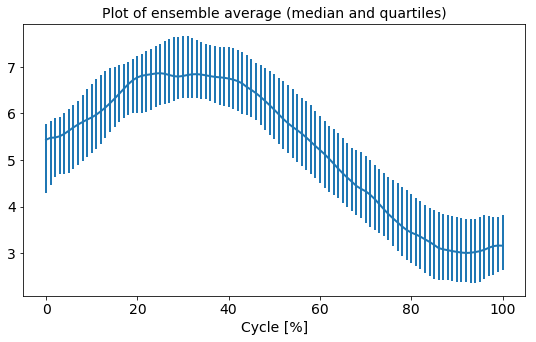

In [7]:
ym = np.median(yn, axis=1)
yq1, yq3 = np.abs(ym-np.percentile(yn, 25, 1)), np.abs(np.percentile(yn, 75, 1)-ym)
# plot of the ensemble average
plt.figure(figsize=(9, 5))
plt.errorbar(tn, ym, np.vstack((yq1, yq3)), linewidth=2)
plt.xlabel('Cycle [%]')
plt.title('Plot of ensemble average (median and quartiles)')
plt.show()